# Correction exercices séance 5

On utilise le jeu de données vu dans la séance 5

In [3]:
import pandas as pd
data = pd.read_csv("../../Séance 5/data/SOSP_Export_base de données diffusable.csv")
data.head()

,Id,contexte_travail,fonction_recherche,statut_professionnel,statut_professionnel_Autre,annee_premiere_publi,Systeme_exploitation,Usage_telephone_mobile,Outils_gestion_travail_av_confinement_visioconférence,Outils_gestion_travail_av_confinement_planification_RDV,...,Souhait_partage_donnees_produites_discipline,Souhait_partage_donnees_produites_pays_continent,Souhait_partage_donnees_produites_domaine_economique,Souhait_partage_donnees_produites_secteur_associatif,Souhait_partage_donnees_produites_sans_restriction,compatibilite_diffusion_partage,evolutions_pratiques_numeriques,sexe,disciplines_9niv,annee_de_naissance-recod10niv
0,1,nous sommes entre 6 et 10 personnes,professeur / professeure des universités et as...,fonctionnaire ou assimilé,NaN,1995,Windows,rarement,parfois,souvent,...,oui,oui,oui,oui,oui,oui,je ne sais pas,un homme,Sciences humaines,61 à 65 ans
1,2,nous sommes plus de 50 personnes,ingénieur / ingénieure de recherche,en CDI,NaN,2005,Windows,rarement,parfois,parfois,...,oui,oui,oui,oui,oui,NaN,NaN,un homme,Médecine,46 à 50 ans
2,3,nous sommes entre 2 et 5 personnes,maître / maîtresse de conférences et assimilés,fonctionnaire ou assimilé,NaN,2006,Windows,parfois,rarement,souvent,...,oui,oui,oui,oui,oui,"oui, tout est dans la chronologie",non,un homme,Médecine,36 à 40 ans
3,4,nous sommes entre 2 et 5 personnes,"directeur / directrice de recherche (CNRS, INS...",fonctionnaire ou assimilé,NaN,1989,Windows;autres OS (Android...),souvent,rarement,souvent,...,oui,oui,non,non,non,Oui,Aucune idée,une femme,Médecine,56 à 60 ans
4,5,nous sommes entre 2 et 5 personnes,doctorant / doctorante (y compris CIFRE),en CDD,NaN,2015,MacOS,souvent,rarement,parfois,...,oui,oui,oui,oui,oui,Oui,Oui,une femme,Médecine,31 à 35 ans


## Exercice 1 : manipulations

Avec Pandas, faire quelques manipulations

- combien de répondants ont publié leur premier article avant 1980 ?
- regarder la distribution de genre (proportion homme/femme) pour les répondants qui appartiennent aux sciences sociales (variable `disciplines_9niv`)
- faire un diagramme circulaire avec la variable `sexe`
- faire un histogramme avec la variable `annee_premiere_publi`

In [6]:
(data["annee_premiere_publi"]<=1980).sum()

18

In [12]:
data[data["disciplines_9niv"]=="Sciences sociales"]["sexe"].value_counts()

une femme                      78
un homme                       75
je ne souhaite pas répondre     8
Name: sexe, dtype: int64

<AxesSubplot:ylabel='sexe'>

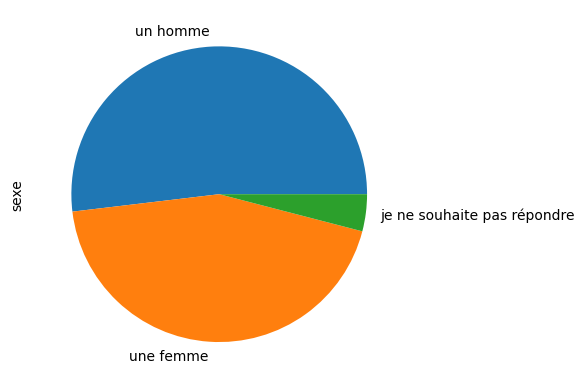

In [19]:
data["sexe"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Frequency'>

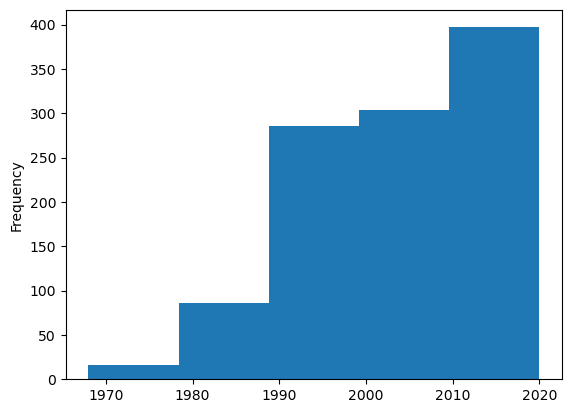

In [23]:
data["annee_premiere_publi"].plot(kind="hist",bins=5)

## Exercice 2 : tableau croisé

La méthode crosstab de Pandas permet de faire un tableau croisé

- faite le tableau croisé entre la variable discipline et la variable genre
- calculez les pourcentages par ligne
- regarder la représentation produite par plot

In [29]:
tableau = pd.crosstab(data["sexe"],data["disciplines_9niv"])

In [32]:
tableau.columns = ['Chimie, Matériaux', 'Lettres et Arts', 'Mathématiques, Informatiques',
       'Médecine', "Physique",
       "Science de l'ingénieur", 'Sciences du vivant', 'Sciences humaines',
       'Sciences sociales']

In [33]:
tableau

,"Chimie, Matériaux",Lettres et Arts,"Mathématiques, Informatiques",Médecine,Physique,Science de l'ingénieur,Sciences du vivant,Sciences humaines,Sciences sociales
sexe,,,,,,,,,
je ne souhaite pas répondre,3,1,8,1,3,2,5,12,8
un homme,30,30,64,25,54,46,84,147,75
une femme,26,27,66,28,46,43,49,115,78


In [37]:
round(100*pd.crosstab(data["sexe"],data["disciplines_9niv"],normalize="index"),2)

disciplines_9niv,"Chimie, Matériaux",Lettres et Arts,"Mathématiques, Informatiques",Médecine,"Physique, Sciences de la terre et de l'Univers",Science de l'ingénieur,Sciences du vivant,Sciences humaines,Sciences sociales
sexe,,,,,,,,,
je ne souhaite pas répondre,6.98,2.33,18.60,2.33,6.98,4.65,11.63,27.91,18.60
un homme,5.41,5.41,11.53,4.50,9.73,8.29,15.14,26.49,13.51
une femme,5.44,5.65,13.81,5.86,9.62,9.00,10.25,24.06,16.32


In [40]:
tableau.to_excel("mon_tableau.xls")

/var/folders/0b/gc4xjfv921z5v__d9vs4ysp40000gn/T/ipykernel_83434/3192744509.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  tableau.to_excel("mon_tableau.xls")


<AxesSubplot:>

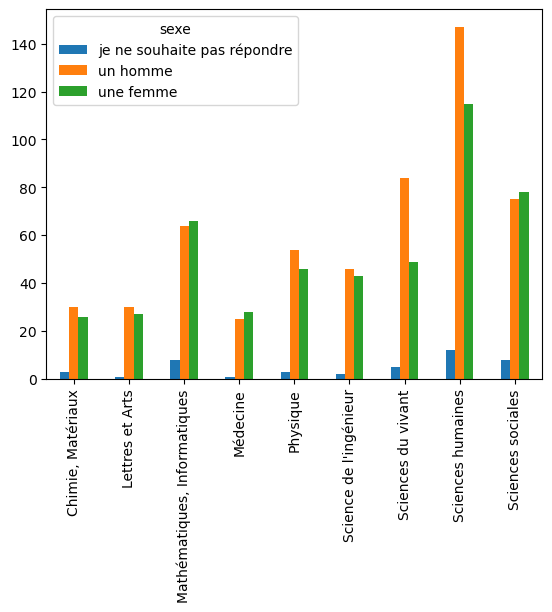

In [44]:
tableau.T.plot(kind="bar")

## Exercice 3 : recodage

- recoder la variable quantitative `annee_premiere_publi` en variable qualitative de trois intervalles avec comme séparateur 1980 et 2010.
- recoder la variable discipline pour créer une catégorie SHS qui regroupe les sciences humaines et les sciences sociales
- recoder la variable `Systeme_exploitation` en trois variables vrai/faux pour chaque système d'exploitation

Avec Pandas (méthode dédiée)

In [49]:
pd.cut(data["annee_premiere_publi"],[1900,1980,2010,2023],labels = ["<1980","1980-2010",">2010"])

0       1980-2010
1       1980-2010
2       1980-2010
3       1980-2010
4           >2010
          ...    
1084    1980-2010
1085    1980-2010
1086    1980-2010
1087    1980-2010
1088        >2010
Name: annee_premiere_publi, Length: 1089, dtype: category
Categories (3, object): ['<1980' < '1980-2010' < '>2010']

A la main

In [50]:
def recodage(cellule):
    if cellule < 1980:
        return "<1980"
    if cellule < 2010:
        return "1980-2010"
    else:
        return ">2010"
data["annee_premiere_publi"].apply(recodage)

0       1980-2010
1       1980-2010
2       1980-2010
3       1980-2010
4           >2010
          ...    
1084    1980-2010
1085    1980-2010
1086    1980-2010
1087    1980-2010
1088        >2010
Name: annee_premiere_publi, Length: 1089, dtype: object

Recoder une variable catégorielle

In [51]:
data["disciplines_9niv"].unique()

array(['Sciences humaines', 'Médecine', 'Mathématiques, Informatiques',
       'Sciences du vivant', 'Sciences sociales', 'Lettres et Arts',
       'Chimie, Matériaux', "Science de l'ingénieur",
       "Physique, Sciences de la terre et de l'Univers", nan],
      dtype=object)

In [53]:
dic_recodage = {'Sciences humaines':"SHS",'Sciences sociales':"SHS"}
data["disciplines_9niv"] = data["disciplines_9niv"].replace(dic_recodage)

In [57]:
data["utilise_windows"] = data["Systeme_exploitation"].str.contains("Windows")
data["utilise_linux"] = data["Systeme_exploitation"].str.contains("Linux|Unix")
data["utilise_mac"] = data["Systeme_exploitation"].str.contains("MacOS")

In [61]:
pd.crosstab(data["sexe"],data["utilise_linux"],normalize="index")

utilise_linux,False,True
sexe,,
je ne souhaite pas répondre,0.727273,0.272727
un homme,0.711504,0.288496
une femme,0.683333,0.316667


## Exercice 4 : visualisation avancée

Proposer une visualisation qui permet de regarder la distribution de l'âge de la première publi en fonction du système d'exploitation qu'ils utilisent

Par exemple, on fait trois graphes les uns sous les autres

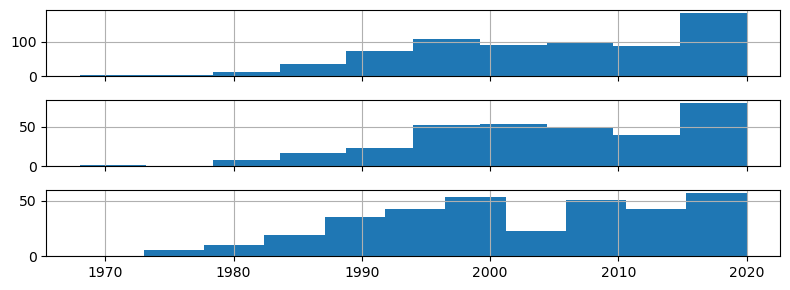

In [77]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1,figsize=(8,3),sharex=True)

data[data["utilise_windows"]]["annee_premiere_publi"].hist(ax=ax[0])
data[data["utilise_linux"]]["annee_premiere_publi"].hist(ax=ax[1])
data[data["utilise_mac"]]["annee_premiere_publi"].hist(ax=ax[2])
plt.tight_layout()

## Exercice Bonus : la méthode groupby

Regardez la documentation de la méthode groupby d'un tableau Pandas et utilisez là pour calculer l'âge moyen de première publication par discipline en une seule ligne de code.

In [ ]:
data["annee_premiere_publi"]

In [64]:
data.groupby("disciplines_9niv")["annee_premiere_publi"].mean().to_csv("résultats.csv")

disciplines_9niv
Chimie, Matériaux                                 2004.000000
Lettres et Arts                                   2003.344828
Mathématiques, Informatiques                      2003.434783
Médecine                                          2005.259259
Physique, Sciences de la terre et de l'Univers    1998.873786
SHS                                               2006.027586
Science de l'ingénieur                            2005.329670
Sciences du vivant                                2001.586957
Name: annee_premiere_publi, dtype: float64